# Filter Merged CDAW/LASCO CME Event & Non-event Catalogs
This notebook is for pulling out training datasets from the event and non-event merged CDAW/LASCO catalogs.

In [1]:
import requests
import pandas as pd

LASCO_Catalog_Filename = '../lasco_img_catalog_lvl_1.txt'
CME_Catalog_Filename = '../cme_event_catlog.txt'
Merged_Catalog_Filename = '../merged_cdaw_lasco_catalog.csv'

C2_non_CME_Catalog_Filename = '../c2_non_events.csv'
C3_non_CME_Catalog_Filename = '../c3_non_events.csv'

# the number of files, sequentially, which we will difference
File_Seq_Size = 6

In [2]:
cme_data = pd.read_csv(Merged_Catalog_Filename)
cme_data = cme_data.drop('Unnamed: 0', axis=1)
cme_data

,filename,telescope,NumCols,NumRows,Filter,Polarizer,datetime,expTime,Remarks,Central,Width,Linear,CDAW_Id
0,22000294.fts,C2,1024,1024,Orange,Clear,1996-01-31 08:01:38,25.4,Poor Event; Only 3 points,274,47,158,5
1,22000295.fts,C2,1024,1024,Orange,Clear,1996-01-31 09:11:14,25.1,Poor Event; Only 3 points,274,47,158,5
2,22000296.fts,C2,1024,1024,Orange,Clear,1996-01-31 10:20:39,25.1,Poor Event; Only 3 points,274,47,158,5
3,22000297.fts,C2,1024,1024,Orange,Clear,1996-01-31 11:30:19,25.9,Poor Event; Only 3 points,274,47,158,5
4,22000298.fts,C2,1024,1024,Orange,Clear,1996-01-31 12:40:17,25.1,Poor Event; Only 3 points,274,47,158,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
568527,32623406.fts,C3,1024,1024,Clear,Clear,2020-05-30 01:54:06,17.6,Poor Event,260,23,187,30311
568528,32623407.fts,C3,1024,1024,Clear,Clear,2020-05-30 02:06:05,18.7,Poor Event,260,23,187,30311
568529,32623408.fts,C3,1024,1024,Clear,Clear,2020-05-30 02:18:05,17.5,Poor Event,260,23,187,30311
568530,32623409.fts,C3,1024,1024,Clear,Clear,2020-05-30 02:30:06,17.6,Poor Event,260,23,187,30311


In [3]:
# function to get unique values 
def unique(list1): 
      
    # insert the list to the set 
    list_set = set(list1) 
    # convert the set to the list 
    unique_list = (list(list_set)) 
    return unique_list
      

In [4]:
# test it out, try to pull a few intervals for events
C2_data = cme_data[cme_data['telescope']=='C2']
C2_data

,filename,telescope,NumCols,NumRows,Filter,Polarizer,datetime,expTime,Remarks,Central,Width,Linear,CDAW_Id
0,22000294.fts,C2,1024,1024,Orange,Clear,1996-01-31 08:01:38,25.4,Poor Event; Only 3 points,274,47,158,5
1,22000295.fts,C2,1024,1024,Orange,Clear,1996-01-31 09:11:14,25.1,Poor Event; Only 3 points,274,47,158,5
2,22000296.fts,C2,1024,1024,Orange,Clear,1996-01-31 10:20:39,25.1,Poor Event; Only 3 points,274,47,158,5
3,22000297.fts,C2,1024,1024,Orange,Clear,1996-01-31 11:30:19,25.9,Poor Event; Only 3 points,274,47,158,5
4,22000298.fts,C2,1024,1024,Orange,Clear,1996-01-31 12:40:17,25.1,Poor Event; Only 3 points,274,47,158,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
568405,22770427.fts,C2,512,512,Orange,-60 D,2020-05-29 02:54:09,0.1,Poor Event,260,23,187,30311
568406,22770428.fts,C2,512,512,Orange,0 Deg,2020-05-29 02:58:01,0.1,Poor Event,260,23,187,30311
568407,22770429.fts,C2,512,512,Orange,+60 D,2020-05-29 03:01:52,0.1,Poor Event,260,23,187,30311
568408,22770430.fts,C2,1024,1024,Orange,Clear,2020-05-29 03:12:09,25.2,Poor Event,260,23,187,30311


In [5]:
# remove events which have poor data OR are different type ("Halo")
slice1 = C2_data
#for filter in ['Only 3 points', 'Only 2 points', 'Poor Event', 'data gap', 'Partial Halo', 'Halo', 'Not LE']:
for filter in ['Very Poor Event', 'Only 2 points', 'Only 3 points', 'data gap', 'Partial Halo', 'Halo', 'Not LE']:
    slice1 = slice1[~slice1['Remarks'].str.contains(filter, regex=True)]
slice1

,filename,telescope,NumCols,NumRows,Filter,Polarizer,datetime,expTime,Remarks,Central,Width,Linear,CDAW_Id
26,22000487.fts,C2,1024,1024,Orange,Clear,1996-02-12 07:01:57,25.1,Poor Event,91,53,160,8
27,22000488.fts,C2,1024,1024,Orange,Clear,1996-02-12 08:16:27,25.1,Poor Event,91,53,160,8
28,22000489.fts,C2,1024,1024,Orange,Clear,1996-02-12 09:30:48,25.1,Poor Event,91,53,160,8
29,22000490.fts,C2,1024,1024,Orange,Clear,1996-02-12 10:45:46,25.1,Poor Event,91,53,160,8
30,22000491.fts,C2,1024,1024,Orange,Clear,1996-02-12 12:00:22,13.8,Poor Event,91,53,160,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...
568405,22770427.fts,C2,512,512,Orange,-60 D,2020-05-29 02:54:09,0.1,Poor Event,260,23,187,30311
568406,22770428.fts,C2,512,512,Orange,0 Deg,2020-05-29 02:58:01,0.1,Poor Event,260,23,187,30311
568407,22770429.fts,C2,512,512,Orange,+60 D,2020-05-29 03:01:52,0.1,Poor Event,260,23,187,30311
568408,22770430.fts,C2,1024,1024,Orange,Clear,2020-05-29 03:12:09,25.2,Poor Event,260,23,187,30311


In [6]:
slice1.sort_values('Linear', ascending=True)[:1]

,filename,telescope,NumCols,NumRows,Filter,Polarizer,datetime,expTime,Remarks,Central,Width,Linear,CDAW_Id
168096,22364444.fts,C2,1024,1024,Orange,Clear,2011-03-09 00:24:06,25.8,Poor Event,243,46,38,16090


In [7]:
slice1.sort_values('Linear', ascending=False)[:1]

,filename,telescope,NumCols,NumRows,Filter,Polarizer,datetime,expTime,Remarks,Central,Width,Linear,CDAW_Id
84534,22187907.fts,C2,1024,1024,Orange,Clear,2005-01-17 10:06:05,25.1,Newly inserted on 2005/12/06,Halo,360,2547,9473


In [8]:
ids = list(slice1['CDAW_Id'])
foo = unique(ids)
len(foo)

5567

In [9]:
#slice1['CDAW_Id'][:20]

In [10]:
#cme_event = slice1[slice1['CDAW_Id']==428]
#cme_event

In [11]:
#list(cme_event['filename']) #.to_string()

In [12]:
# how many files if we isolate 1024x1024 images
slice2 = slice1
slice2 = slice2[slice2['NumCols']==1024]
slice2 = slice2[slice2['NumRows']==1024]
slice2

,filename,telescope,NumCols,NumRows,Filter,Polarizer,datetime,expTime,Remarks,Central,Width,Linear,CDAW_Id
26,22000487.fts,C2,1024,1024,Orange,Clear,1996-02-12 07:01:57,25.1,Poor Event,91,53,160,8
27,22000488.fts,C2,1024,1024,Orange,Clear,1996-02-12 08:16:27,25.1,Poor Event,91,53,160,8
28,22000489.fts,C2,1024,1024,Orange,Clear,1996-02-12 09:30:48,25.1,Poor Event,91,53,160,8
29,22000490.fts,C2,1024,1024,Orange,Clear,1996-02-12 10:45:46,25.1,Poor Event,91,53,160,8
30,22000491.fts,C2,1024,1024,Orange,Clear,1996-02-12 12:00:22,13.8,Poor Event,91,53,160,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...
568402,22770424.fts,C2,1024,1024,Orange,Clear,2020-05-29 02:00:05,25.1,Poor Event,260,23,187,30311
568403,22770425.fts,C2,1024,1024,Orange,Clear,2020-05-29 02:24:05,25.1,Poor Event,260,23,187,30311
568404,22770426.fts,C2,1024,1024,Orange,Clear,2020-05-29 02:48:06,25.1,Poor Event,260,23,187,30311
568408,22770430.fts,C2,1024,1024,Orange,Clear,2020-05-29 03:12:09,25.2,Poor Event,260,23,187,30311


In [13]:
ids = list(slice2['CDAW_Id'])
len(unique(ids))

5544

In [14]:
#  Isolate events where we have 'campaign mode' (e.g. strange image sizes)
slice3 = slice1
slice3 = slice3[slice3['NumCols']!=1024]
slice3 = slice3[slice3['NumRows']!=1024]
campaign_ids = unique(list(slice3['CDAW_Id']))
print (len(campaign_ids))
#sorted(campaign_ids)

3016


In [15]:
# cleaned list of general CMEs is now (campaign mode subtracted out)
cleaned = slice2[~slice2['CDAW_Id'].isin(campaign_ids)]
cleaned

,filename,telescope,NumCols,NumRows,Filter,Polarizer,datetime,expTime,Remarks,Central,Width,Linear,CDAW_Id
26,22000487.fts,C2,1024,1024,Orange,Clear,1996-02-12 07:01:57,25.1,Poor Event,91,53,160,8
27,22000488.fts,C2,1024,1024,Orange,Clear,1996-02-12 08:16:27,25.1,Poor Event,91,53,160,8
28,22000489.fts,C2,1024,1024,Orange,Clear,1996-02-12 09:30:48,25.1,Poor Event,91,53,160,8
29,22000490.fts,C2,1024,1024,Orange,Clear,1996-02-12 10:45:46,25.1,Poor Event,91,53,160,8
30,22000491.fts,C2,1024,1024,Orange,Clear,1996-02-12 12:00:22,13.8,Poor Event,91,53,160,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...
560500,22752477.fts,C2,1024,1024,Orange,Clear,2020-01-01 13:48:05,25.1,Poor Event,126,59,214,30124
560501,22752478.fts,C2,1024,1024,Orange,Clear,2020-01-01 14:00:05,26.5,Poor Event,126,59,214,30124
560502,22752479.fts,C2,1024,1024,Orange,Clear,2020-01-01 14:12:05,25.1,Poor Event,126,59,214,30124
560503,22752480.fts,C2,1024,1024,Orange,Clear,2020-01-01 14:24:05,25.6,Poor Event,126,59,214,30124


In [16]:
ids = unique(list(cleaned['CDAW_Id']))
len(ids)

2538

In [17]:
# Remove events where they have only one file associated with it
result = cleaned.groupby('CDAW_Id', sort=False).count()
#result[result['CDAW_Id']=='8']
result['filename']


CDAW_Id
8         5
12        9
16        3
37        4
38        8
         ..
29934    15
29939    24
29953    24
30052    15
30124    25
Name: filename, Length: 2538, dtype: int64

Text(0, 0.5, 'Frequency')

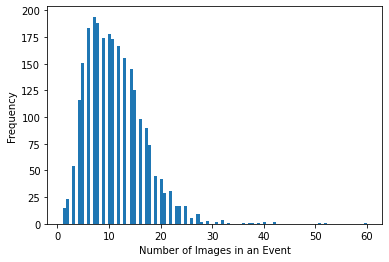

In [18]:
# plot number distribution of events
import matplotlib.pyplot as plt
result['filename'].plot.hist(bins=100)
plt.xlabel("Number of Images in an Event")
plt.ylabel("Frequency")
#plt.set(xlabel="foo")

Text(0, 0.5, 'Frequency')

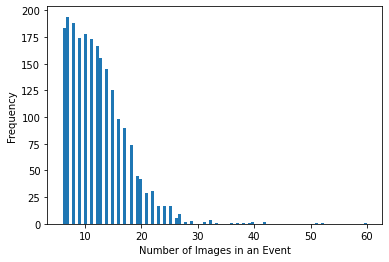

In [19]:
# find the number of events where we have File_Seq_Size or more files (images)
# we will train on first 5 differenced images
events_with_sufficent_images = result[result['filename']>=File_Seq_Size]
events_with_sufficent_images ['filename'].plot.hist(bins=100)
plt.xlabel("Number of Images in an Event")
plt.ylabel("Frequency")

#events_with_sufficent_images

In [20]:
#filter for the events with sufficent images now
esi_ids = list(events_with_sufficent_images.index)

cleaned2 = cleaned[cleaned['CDAW_Id'].isin(esi_ids)]
cleaned2

#esi_ids

,filename,telescope,NumCols,NumRows,Filter,Polarizer,datetime,expTime,Remarks,Central,Width,Linear,CDAW_Id
70,22000681.fts,C2,1024,1024,Orange,Clear,1996-03-02 04:32:25,25.1,Poor Event,88,36,108,12
71,22000682.fts,C2,1024,1024,Orange,Clear,1996-03-02 05:28:23,25.1,Poor Event,88,36,108,12
72,22000683.fts,C2,1024,1024,Orange,Clear,1996-03-02 06:31:53,25.8,Poor Event,88,36,108,12
73,22000684.fts,C2,1024,1024,Orange,Clear,1996-03-02 07:35:53,25.1,Poor Event,88,36,108,12
74,22000685.fts,C2,1024,1024,Orange,Clear,1996-03-02 08:39:53,25.1,Poor Event,88,36,108,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...
560500,22752477.fts,C2,1024,1024,Orange,Clear,2020-01-01 13:48:05,25.1,Poor Event,126,59,214,30124
560501,22752478.fts,C2,1024,1024,Orange,Clear,2020-01-01 14:00:05,26.5,Poor Event,126,59,214,30124
560502,22752479.fts,C2,1024,1024,Orange,Clear,2020-01-01 14:12:05,25.1,Poor Event,126,59,214,30124
560503,22752480.fts,C2,1024,1024,Orange,Clear,2020-01-01 14:24:05,25.6,Poor Event,126,59,214,30124


<AxesSubplot:ylabel='Frequency'>

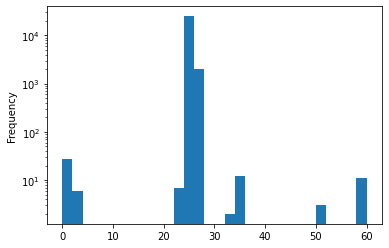

In [21]:
# examine exposure times
cleaned2['expTime'].plot.hist(logy=True, bins=30)

In [22]:
# get rid of exposure times which are not nominal (e.g. 25.1)
lower_exptime = 24.75
upper_exptime = 27.5

slice4 = cleaned2
slice4 = slice4[slice4['expTime']>= upper_exptime]

slice5 = cleaned2
slice5 = slice5[slice5['expTime']<= lower_exptime]

poor_exposure_ids = list(slice4['CDAW_Id'])
poor_exposure_ids.extend(list(slice5['CDAW_Id']))
poor_exposure_ids = unique (poor_exposure_ids)
len(poor_exposure_ids)

36

In [23]:
cleaned3 = cleaned2[~cleaned2['CDAW_Id'].isin(poor_exposure_ids)]
cleaned3

,filename,telescope,NumCols,NumRows,Filter,Polarizer,datetime,expTime,Remarks,Central,Width,Linear,CDAW_Id
70,22000681.fts,C2,1024,1024,Orange,Clear,1996-03-02 04:32:25,25.1,Poor Event,88,36,108,12
71,22000682.fts,C2,1024,1024,Orange,Clear,1996-03-02 05:28:23,25.1,Poor Event,88,36,108,12
72,22000683.fts,C2,1024,1024,Orange,Clear,1996-03-02 06:31:53,25.8,Poor Event,88,36,108,12
73,22000684.fts,C2,1024,1024,Orange,Clear,1996-03-02 07:35:53,25.1,Poor Event,88,36,108,12
74,22000685.fts,C2,1024,1024,Orange,Clear,1996-03-02 08:39:53,25.1,Poor Event,88,36,108,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...
560500,22752477.fts,C2,1024,1024,Orange,Clear,2020-01-01 13:48:05,25.1,Poor Event,126,59,214,30124
560501,22752478.fts,C2,1024,1024,Orange,Clear,2020-01-01 14:00:05,26.5,Poor Event,126,59,214,30124
560502,22752479.fts,C2,1024,1024,Orange,Clear,2020-01-01 14:12:05,25.1,Poor Event,126,59,214,30124
560503,22752480.fts,C2,1024,1024,Orange,Clear,2020-01-01 14:24:05,25.6,Poor Event,126,59,214,30124


In [58]:
# filter polarizer, Filter to be consistent
C2_Filter = 'Orange'
C2_Polarizer = 'Clear'
cleaned3 = cleaned3[cleaned3['Filter']==C2_Filter]
cleaned3 = cleaned3[cleaned3['Polarizer']==C2_Polarizer]
cleaned3

,filename,telescope,NumCols,NumRows,Filter,Polarizer,datetime,expTime,Remarks,Central,Width,Linear,CDAW_Id
70,22000681.fts,C2,1024,1024,Orange,Clear,1996-03-02 04:32:25,25.1,Poor Event,88,36,108,12
71,22000682.fts,C2,1024,1024,Orange,Clear,1996-03-02 05:28:23,25.1,Poor Event,88,36,108,12
72,22000683.fts,C2,1024,1024,Orange,Clear,1996-03-02 06:31:53,25.8,Poor Event,88,36,108,12
73,22000684.fts,C2,1024,1024,Orange,Clear,1996-03-02 07:35:53,25.1,Poor Event,88,36,108,12
74,22000685.fts,C2,1024,1024,Orange,Clear,1996-03-02 08:39:53,25.1,Poor Event,88,36,108,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...
560500,22752477.fts,C2,1024,1024,Orange,Clear,2020-01-01 13:48:05,25.1,Poor Event,126,59,214,30124
560501,22752478.fts,C2,1024,1024,Orange,Clear,2020-01-01 14:00:05,26.5,Poor Event,126,59,214,30124
560502,22752479.fts,C2,1024,1024,Orange,Clear,2020-01-01 14:12:05,25.1,Poor Event,126,59,214,30124
560503,22752480.fts,C2,1024,1024,Orange,Clear,2020-01-01 14:24:05,25.6,Poor Event,126,59,214,30124


<AxesSubplot:ylabel='Frequency'>

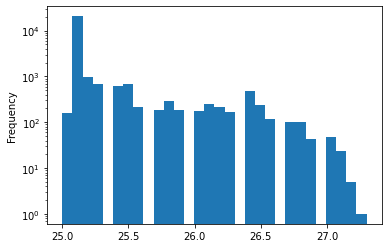

In [24]:
# examine exposure times
cleaned3['expTime'].plot.hist(logy=True, bins=30)

<AxesSubplot:ylabel='Frequency'>

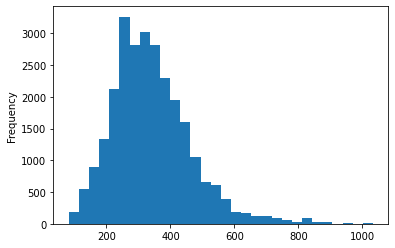

In [25]:
cleaned3['Linear'].plot.hist(bins=30)

<AxesSubplot:ylabel='Frequency'>

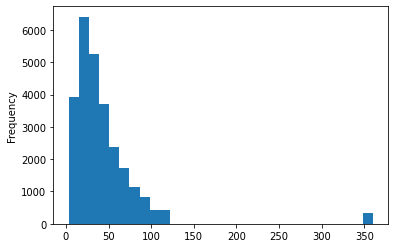

In [26]:
cleaned3['Width'].plot.hist(bins=30)

In [27]:
#write out list of dataset (postitive training)
training = cleaned3[['CDAW_Id','datetime','filename']]
training.to_csv("../C2_positive_training_dataset.csv", index=None)

## Now build out a negative training dataset for both C2 and C3

In [65]:
# load non-event merged catalogs
c2_non_events = pd.read_csv(C2_non_CME_Catalog_Filename)
c3_non_events = pd.read_csv(C3_non_CME_Catalog_Filename)
c2_non_events

,filename,datetime,NumCols,NumRows,Filter,Polarizer,expTime
0,22705893.fts,2018-12-13 15:36:06,1024,1024,Orange,Clear,25.1
1,22705894.fts,2018-12-13 15:48:05,1024,1024,Orange,Clear,25.4
2,22705895.fts,2018-12-13 16:00:05,1024,1024,Orange,Clear,25.1
3,22705896.fts,2018-12-13 16:12:05,1024,1024,Orange,Clear,25.1
4,22705897.fts,2018-12-13 16:24:06,1024,1024,Orange,Clear,25.1
...,...,...,...,...,...,...,...
9593,22717504.fts,2019-03-18 21:48:05,1024,1024,Orange,Clear,25.1
9594,22717505.fts,2019-03-18 22:00:06,1024,1024,Orange,Clear,25.5
9595,22717506.fts,2019-03-18 22:12:05,1024,1024,Orange,Clear,25.1
9596,22717507.fts,2019-03-18 22:24:05,1024,1024,Orange,Clear,25.1


In [66]:
# apply the same filter/constraints as for CME event data 
def filter_data(data:pd.DataFrame, filtername:str, polarizer:str)->pd.DataFrame:

    slice1 = data
    
    # only 1024x1024
    slice1 = slice1[slice1['NumRows']==1024]
    slice1 = slice1[slice1['NumCols']==1024]
    
    # only right exptimes
    slice1 = slice1[slice1['expTime'] <= upper_exptime]
    slice1 = slice1[slice1['expTime'] >= lower_exptime]
    
    slice1 = slice1[slice1['Filter']==filtername]
    slice1 = slice1 [slice1['Polarizer']==polarizer]
    
    # TODO?: filter by time window (start year, stop year)
    # where we drew CME events from (to better match non-CME
    # activity of sun in same period)
    
    return slice1

c2_ne = filter_data(c2_non_events, C2_Filter, C2_Polarizer)
c2_ne

,filename,datetime,NumCols,NumRows,Filter,Polarizer,expTime
0,22705893.fts,2018-12-13 15:36:06,1024,1024,Orange,Clear,25.1
1,22705894.fts,2018-12-13 15:48:05,1024,1024,Orange,Clear,25.4
2,22705895.fts,2018-12-13 16:00:05,1024,1024,Orange,Clear,25.1
3,22705896.fts,2018-12-13 16:12:05,1024,1024,Orange,Clear,25.1
4,22705897.fts,2018-12-13 16:24:06,1024,1024,Orange,Clear,25.1
...,...,...,...,...,...,...,...
9593,22717504.fts,2019-03-18 21:48:05,1024,1024,Orange,Clear,25.1
9594,22717505.fts,2019-03-18 22:00:06,1024,1024,Orange,Clear,25.5
9595,22717506.fts,2019-03-18 22:12:05,1024,1024,Orange,Clear,25.1
9596,22717507.fts,2019-03-18 22:24:05,1024,1024,Orange,Clear,25.1


<AxesSubplot:ylabel='Frequency'>

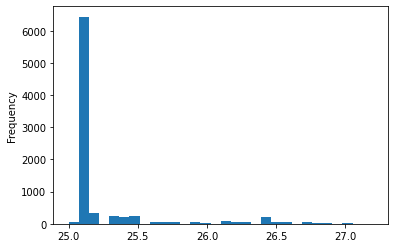

In [67]:
c2_ne['expTime'].plot.hist(bins=30)

In [68]:
training = c2_ne[['datetime','filename']]
training.to_csv("../C2_negative_training_dataset.csv", index=None)